# *Gromacs_py* basic example

Here is an example of a short simulation of the SH3 domain of phospholipase Cγ1.
Seven successive steps are used:

1. Topologie creation using ``GmxSys.prepare_top()``.
2. Minimisation of the structure using ``GmxSys.em_2_steps()``.
3. Solvation of the system using ``GmxSys.``.
4. Minimisation of the system using ``GmxSys.``.
5. Equilibration of the system using ``GmxSys.``.
6. Production run using ``GmxSys.``.
7. Extension of the production run using ``GmxSys.``.

## Import

In [55]:
import sys
import os
import urllib.request  
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Gromacs_py import
sys.path.insert(0, os.path.abspath('..'))
import gromacs_py.gromacs.gmx5 as gmx

## Simulation setup

In [2]:
# Setup data location
DATA_OUT = 'data_sim'
PDB_ID = '1Y0M'

# Setup
ion_C = 0.15

# Energy Minimisation
em_folder = os.path.join(DATA_OUT, 'em')
em_step_number = 1000

# Equilibration
dt = 0.005

## Get PDB file from the ``rcsb.org`` website 

In [3]:
os.makedirs(DATA_OUT, exist_ok = True)

raw_pdb = urllib.request.urlretrieve('http://files.rcsb.org/download/{}.pdb'.format(PDB_ID),
                           '{}/{}.pdb'.format(DATA_OUT, PDB_ID))

## Define the simulation system

In [4]:
md_sys = gmx.GmxSys(name=PDB_ID, coor_file=raw_pdb[0])
md_sys.display()


name         : 1Y0M
coor_file    : data_sim/1Y0M.pdb
nt           : 0
ntmpi        : 0


## Create topologie:

In [5]:
md_sys.prepare_top(out_folder=os.path.join(DATA_OUT, 'prot_top'), vsite='hydrogens')
md_sys.create_box(dist=1.0, box_type="dodecahedron", check_file_out=True)

Succeed to read file 00_1Y0M.pqr ,  996 atoms found
Chain: A  Residue: 0 to 60
PDB file 01_1Y0M_good_his.pdb already exist, file not saved
-Create topologie
create_top not launched 1Y0M_pdb2gmx.pdb already exist
-Create pbc box
create_box not launched data_sim/prot_top/1Y0M_pdb2gmx_box.pdb already exist


## Energy minimisation

In [6]:
md_sys.em_2_steps(out_folder=DATA_OUT+'/prot_em',
                  no_constr_nsteps=em_step_number,
                  constr_nsteps=em_step_number,
                  posres="",
                  create_box_flag=False)

Mdp files not created,  Init_em_1Y0M.mdp already exist
-Create the tpr file  Init_em_1Y0M.tpr
create_tpr not launched Init_em_1Y0M.tpr already exist
-Launch the simulation Init_em_1Y0M.tpr
Simulation not launched Init_em_1Y0M.gro already exist
Mdp files not created,  1Y0M.mdp already exist
-Create the tpr file  1Y0M.tpr
create_tpr not launched 1Y0M.tpr already exist
-Launch the simulation 1Y0M.tpr
Simulation not launched 1Y0M.gro already exist


# Plot energy:

-Extract energy
gmx energy -f data_sim/prot_em/1Y0M.edr -o tmp.xvg


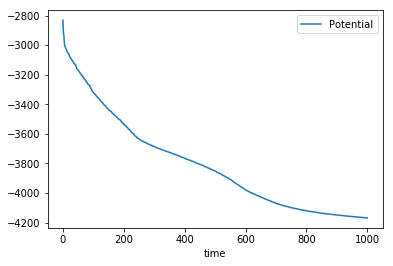

In [57]:
ener_dat = os.path.join(DATA_OUT, 'energy.xvg')

ener_pd = md_sys.get_ener(selection_list=['Potential'])
ener_pd.plot(x='time')
